In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
data = pd.read_csv("C:/Users/ASUS/Internships/CodeClause/Prodigy Infotech/TASK 3/bank.csv")  # Replace with your dataset path

In [3]:
# Preprocessing steps (handle missing values, encode categorical variables, etc.)
data = data.fillna(data.mean())  # Example: filling missing values with the mean
data = pd.get_dummies(data)  # Example: one-hot encoding using pandas get_dummies()

# Verify the column names in your dataset
print(data.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'depo_no', 'depo_yes'],
      dtype='object')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14488\3845049730.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())  # Example: filling missing values with the mean


In [4]:
X = data[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
y = data['depo_yes']

In [5]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Make Predictions
y_pred = clf.predict(X_test)

In [8]:
# Evaluate the Model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1166
           1       0.70      0.68      0.69      1067

    accuracy                           0.71      2233
   macro avg       0.71      0.71      0.71      2233
weighted avg       0.71      0.71      0.71      2233



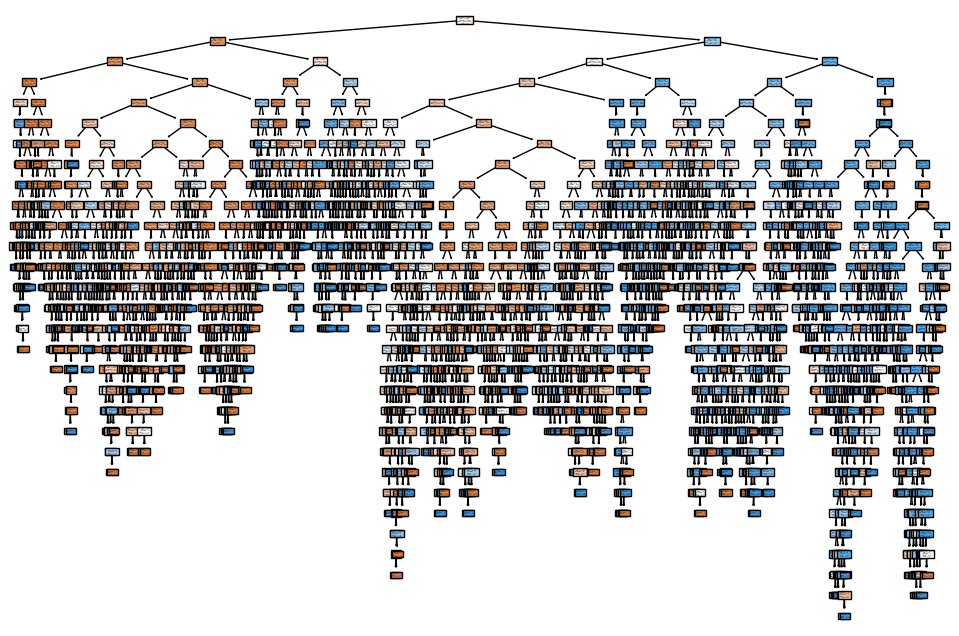

In [9]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [10]:
# Feature Importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

    Feature  Importance
3  duration    0.430422
1   balance    0.163810
0       age    0.128367
5     pdays    0.121979
2       day    0.112158
4  campaign    0.037676
6  previous    0.005588


In [11]:
# Hyperparameter Tuning using Grid Search
param_grid = {'max_depth': [None, 5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [12]:
best_params = grid_search.best_params_
clf = DecisionTreeClassifier(**best_params)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.78      1166
           1       0.77      0.75      0.76      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



In [15]:
# Updated Decision Tree Classifier with Best Hyperparameters
clf_tuned = DecisionTreeClassifier(**best_params)
clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)
print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.78      0.80      0.78      1166
           1       0.77      0.75      0.76      1067

    accuracy                           0.77      2233
   macro avg       0.77      0.77      0.77      2233
weighted avg       0.77      0.77      0.77      2233



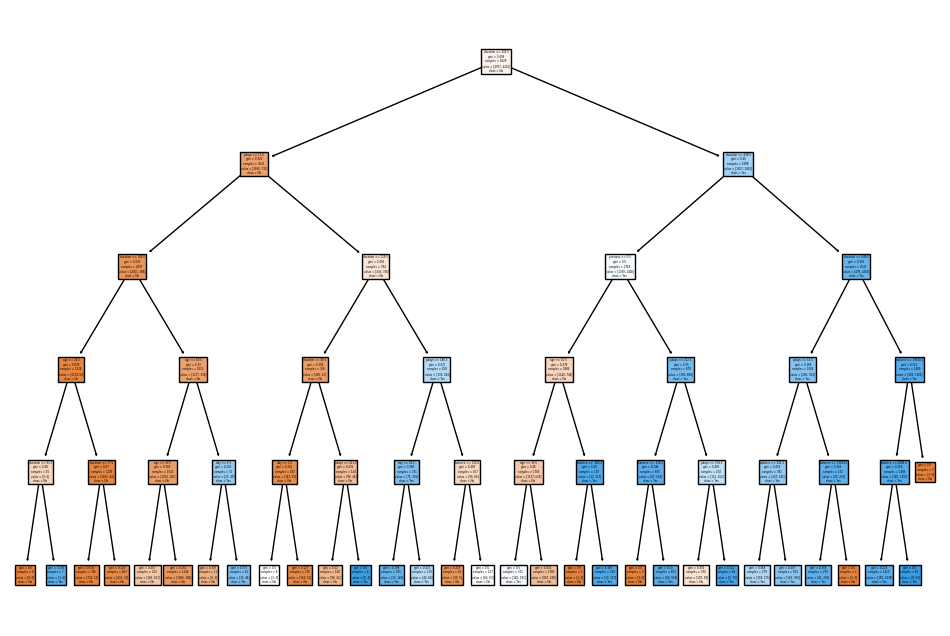

In [16]:
plt.figure(figsize=(12, 8))
plt.title("Decision Tree")
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()